## PCA Practice

In [1]:
# loading MNIST Data set and importing useful packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
d0 = pd.read_csv("mnist_train.csv")

print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [3]:
# Saving the variables into l

l = d0['label']

#Droping the label data and storing the pixels data into d

d = d0.drop("label" , axis = 1)

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


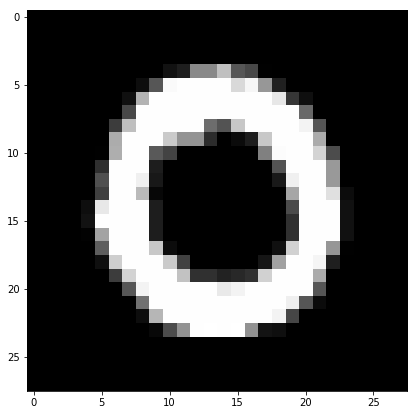

0


In [5]:
# Displaying and plotting the number

plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28) # reshaping 1d to 2d pixel array

plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

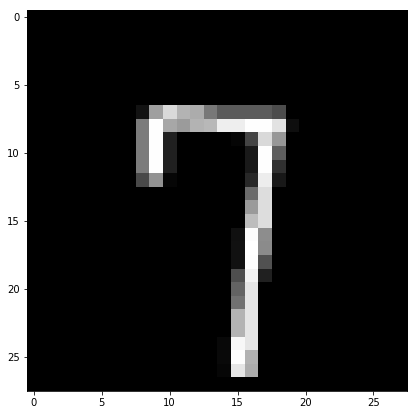

7


In [6]:
# displaying and plotting the number for label = 50

plt.figure(figsize=(7,7))
idx = 50

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")

plt.show()

print(l[idx])


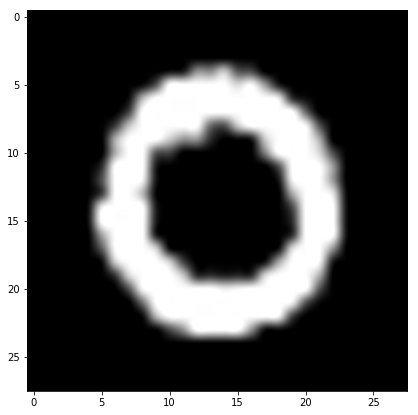

0


In [7]:
# display and plot a number for index 15000

plt.figure(figsize = (7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data ,interpolation = "catrom", cmap = "gray")
plt.show()

print(l[idx])

## 2D Visualizing PCA

In [8]:
labels = l.head(15000)
data = d.head(15000)

print("The shape of the sample data " , data.shape)
print("\nThe shape of the label data ", labels.shape)

The shape of the sample data  (15000, 784)

The shape of the label data  (15000,)


In [9]:
# Data Preprocessing : Standardising the data

from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)



(15000, 784)


In [10]:
#Find the covariance matrix : A^T * A

sample_data = standardized_data

# matrix multiplication using numpy

covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of the covariance matrix ", covar_matrix.shape)


The shape of the covariance matrix  (784, 784)


In [13]:
# Finding top two eigen_values and corresponding eigen vectors 
# For projecting onto a space of 2Dim space

from scipy.linalg import eigh

# The parameter eigvals defined (low value to high value)
# The eigh function will return the eigen values in ascending order
# The below code generates top two eigen values and vectors i.e. 782 and 783


values, vectors = eigh(covar_matrix, eigvals = (782, 783))

print("Shape of the eigen vectors ", vectors.shape)

#Converting the eigen vectors into 2D shape for easiness of further computations
vectors = vectors.T

#Updated shape of eigen vectors

print("Updated shape of eigen vectors ", vectors.shape)

# Here the vectors[1] represent the eigen vector corresponding to the 1st principal eigen vector
# Here the vectors[0] represent the eigen vector corresponding to the 2nd principal eigen vector

Shape of the eigen vectors  (784, 2)
Updated shape of eigen vectors  (2, 784)


In [14]:
# Projecting the original data point on the plane
# formed by two principal eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T)

print("Resultant new data points' Shape ", vectors.shape, "X", sample_data.T.shape, " = ", new_coordinates.shape)

Resultant new data points' Shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [15]:
#Appending label to the 2nd projected data 
new_coordinates = np.vstack((new_coordinates, labels)).T

#Creating a new data frame for the plotting the labelled points
dataframe = pd.DataFrame(data = new_coordinates, columns = ("1st principal", "2nd Principal" , "label"))
print(dataframe.head())



   1st principal  2nd Principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


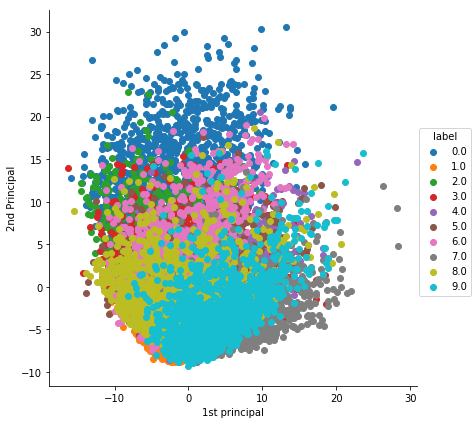

In [17]:
#Plotting the 2d data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue = "label" , size = 6).map(plt.scatter, "1st principal", "2nd Principal").add_legend()
plt.show()

# PCA using scikit learn

In [18]:
#Initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [19]:
#Configuring the parameters
# Number of components = 2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca reduced will contain the 2d projects of sample data
print("Shape of PCA_reduced.shape " , pca_data.shape)

Shape of PCA_reduced.shape  (15000, 2)


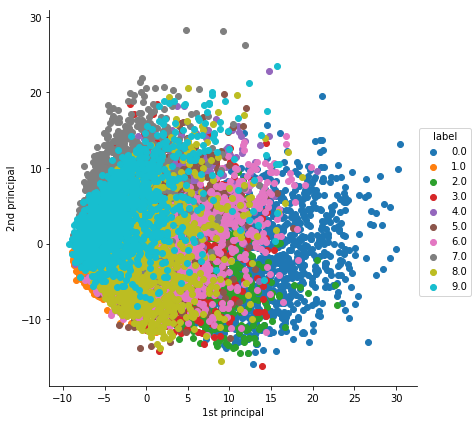

In [20]:
#Attaching the label for each 2d data point

pca_data = np.vstack((pca_data.T, labels)).T

#creating the new data from which help us in plotting the result data

pca_df = pd.DataFrame(data = pca_data, columns = ("1st principal", "2nd principal", "label"))
sns.FacetGrid(pca_df, hue = "label", size = 6).map(plt.scatter, "1st principal", "2nd principal").add_legend()
plt.show()

# PCA for dimentionality reduction (not for visualizing)

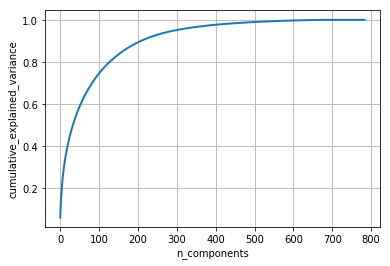

In [22]:
# PCA for dimentionality reduction not visualizing

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

#Plot the PCA Spectrum
plt.figure(1, figsize = (6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis("tight")
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cumulative_explained_variance")
plt.show()


#If we take 200-dimensions , approx. 90% of variance is explained


# t-SNE using scikit-learn

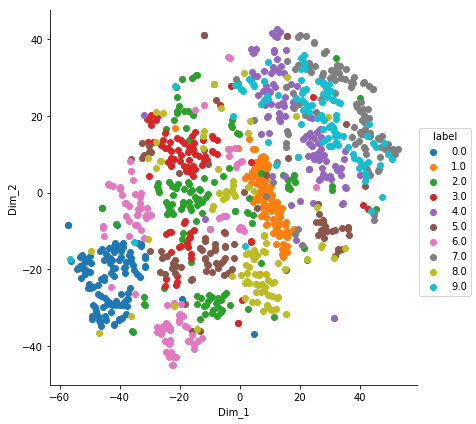

In [25]:
#TSNE

from sklearn.manifold import TSNE

data_1000 = standardized_data[0 : 1000, :]
labels_1000 = labels[0 : 1000]

model = TSNE(n_components = 2, random_state = 2)
#configuring the parameters
#the number of components = 2
#default perplexity = 30
#default learning rate = 200
#default maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

#creating a new data frame which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data , columns= ("Dim_1" , "Dim_2", "label"))

#Ploting the result of the tsne
sns.FacetGrid(tsne_df, hue= "label", size = 6 ).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()



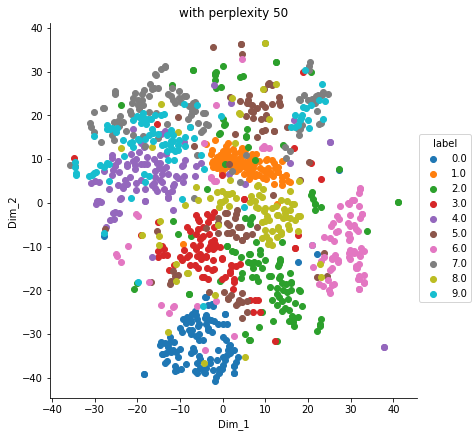

In [26]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data = model.fit_transform(data_1000)

#creating the new data from wghich help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data , columns = ("Dim_1", "Dim_2", "label"))

#Ploting the result of tsne
sns.FacetGrid(tsne_df, hue = "label", size = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title("with perplexity 50")
plt.show()


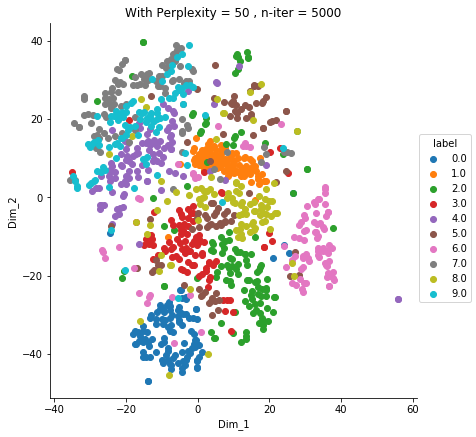

In [28]:
model = TSNE(n_components = 2 , random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(data_1000)

#creating a new data from which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label"))

#ploting the result of tsne
sns.FacetGrid(tsne_df, hue = "label", size = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title("With Perplexity = 50 , n-iter = 5000")
plt.show()


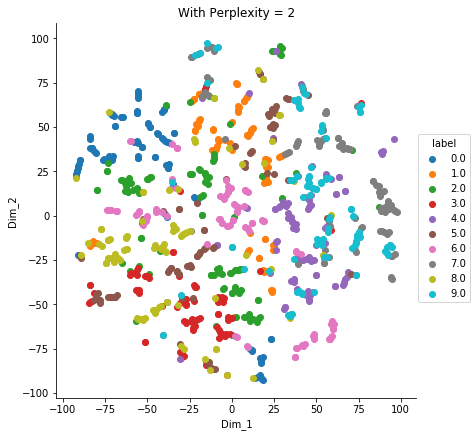

In [30]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 2 )
tsne_data = model.fit_transform(data_1000)

#Creating new data from which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1" , "Dim_2", "label"))

#Ploting the result of tsne
sns.FacetGrid(tsne_df, hue = "label" , size= 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title("With Perplexity = 2")
plt.show()
